In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#прочитать и сформировать MultiHeader
file = pd.ExcelFile('Dataset_all_1.xlsx')
df = pd.read_excel(file, header = 0, index_col=0)

In [3]:
#удалить столбцы с >20% нулевых значений
df_clean = df.dropna(axis = 1, thresh=int(0.8*len(df)))

In [4]:
#заполнить оставшиеся пропущенные значения средним по столбцам
df_fill_mean = df_clean.fillna(df_clean.mean())

In [5]:
features = df_fill_mean.columns.values.tolist()[2:]

In [6]:
# Separating out the features
x = df_fill_mean.iloc[:,2:].values
#x = x[:,1:]
x

array([[79.,  1.,  1., ...,  0.,  0.,  3.],
       [76.,  1.,  1., ...,  2.,  3.,  3.],
       [72.,  1.,  0., ...,  0.,  1.,  1.],
       ...,
       [26.,  1.,  0., ...,  0.,  1.,  1.],
       [82.,  1.,  0., ...,  0.,  1.,  1.],
       [35.,  0.,  0., ...,  2.,  2.,  2.]])

In [7]:
# Separating out the target
y = df_fill_mean.loc[:,'Діагноз'].values
y

array(['ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ',
       'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'ХОЗЛ', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'БА',
       'БА', 'БА', 'БА', 'БА', 'БА', 'БА', 'Пневмонія', 'Пневмонія',
       'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія',
       'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія',
       'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмонія', 'Пневмон

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(principalComponents)

[[-3.69623263e+01  4.78231342e+00 -1.33846773e+01]
 [-1.73784579e+01  1.39913773e+01  5.83968498e+00]
 [-3.34469620e+01  2.60814502e+01  1.58392056e+01]
 [-8.63177187e+00 -3.11172689e+00  2.92779572e-01]
 [-4.11578006e+01 -6.50415746e+00 -1.37354557e+01]
 [-1.34384345e+01 -2.12933633e+01  7.69710327e+00]
 [-4.96258038e+00  1.95065693e+01 -1.34586035e+00]
 [-9.03809677e+00  3.06055377e+00 -9.57261783e-01]
 [ 2.91915886e+00 -9.00581400e-02 -9.41904926e+00]
 [-1.98824070e+01 -3.28946902e+01  6.55005475e+00]
 [-1.20899430e+01 -1.27199658e+01 -4.15748362e+00]
 [-3.58190664e+00 -2.50395503e+01 -9.23357645e+00]
 [-1.97810845e+01  9.56652198e+00 -1.49852712e+00]
 [-1.21691042e+01  4.00752199e+00 -1.28701907e+01]
 [-2.29709777e+01  1.21608720e+01 -5.33281956e+00]
 [ 3.69628548e+00 -1.75893695e+01  1.11621527e+00]
 [-4.16359973e+01  1.30595374e+01 -1.22220534e+01]
 [-9.01942129e+00 -5.04400861e+00  1.52202569e+01]
 [-1.52832870e+01  6.16066305e+00 -1.74133253e+01]
 [-3.72174247e+00 -1.56947521e+

In [9]:
principalDf = pd.DataFrame(data = principalComponents,
                            columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf
finalDf3 = pd.concat([principalDf, df_fill_mean[['Діагноз']].reset_index(drop=True)], axis = 1)
finalDf3

,principal component 1,principal component 2,principal component 3,Діагноз
0,-36.962326,4.782313,-13.384677,ХОЗЛ
1,-17.378458,13.991377,5.839685,ХОЗЛ
2,-33.446962,26.081450,15.839206,ХОЗЛ
3,-8.631772,-3.111727,0.292780,ХОЗЛ
4,-41.157801,-6.504157,-13.735456,ХОЗЛ
...,...,...,...,...
127,-14.132983,47.647766,-7.194686,Пневмонія
128,-18.195633,15.358142,-25.040800,Пневмонія
129,30.438588,-9.488952,11.602605,Пневмонія
130,-17.622930,13.764174,14.062587,Пневмонія


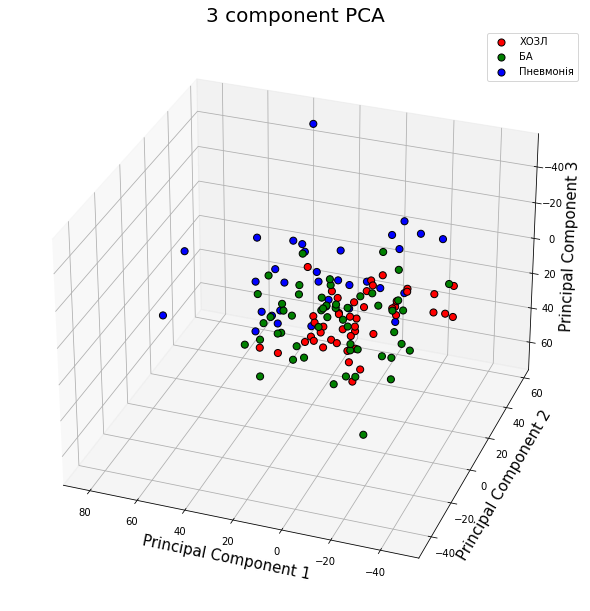

In [10]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=70) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['Діагноз'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1'],
               finalDf3.loc[indicesToKeep, 'principal component 2'],
               finalDf3.loc[indicesToKeep, 'principal component 3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.legend(targets)
ax.grid()

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE (n_components = 3, perplexity = 50, n_iter=5000, random_state = 0, learning_rate = 250)
x_3D = tsne.fit_transform(x)

In [12]:
tsneDf = pd.DataFrame(data = x_3D, columns = ['dim 1', 'dim 2', 'dim 3'])
tsneDf

,dim 1,dim 2,dim 3
0,-83.465378,176.064194,-687.960388
1,-338.860565,349.279602,127.539986
2,294.105835,-17.345329,666.226013
3,109.584015,99.043732,-331.560699
4,-273.202026,-100.986305,624.369934
...,...,...,...
127,41.183861,-319.860901,621.169189
128,-202.864624,54.574699,326.795013
129,6.860197,-370.130035,-184.174438
130,-37.473278,126.961456,640.827087


In [13]:
final_tsneDf = pd.concat([tsneDf, df[['Діагноз']].reset_index(drop=True)], axis = 1)
final_tsneDf

,dim 1,dim 2,dim 3,Діагноз
0,-83.465378,176.064194,-687.960388,ХОЗЛ
1,-338.860565,349.279602,127.539986,ХОЗЛ
2,294.105835,-17.345329,666.226013,ХОЗЛ
3,109.584015,99.043732,-331.560699,ХОЗЛ
4,-273.202026,-100.986305,624.369934,ХОЗЛ
...,...,...,...,...
127,41.183861,-319.860901,621.169189,Пневмонія
128,-202.864624,54.574699,326.795013,Пневмонія
129,6.860197,-370.130035,-184.174438,Пневмонія
130,-37.473278,126.961456,640.827087,Пневмонія


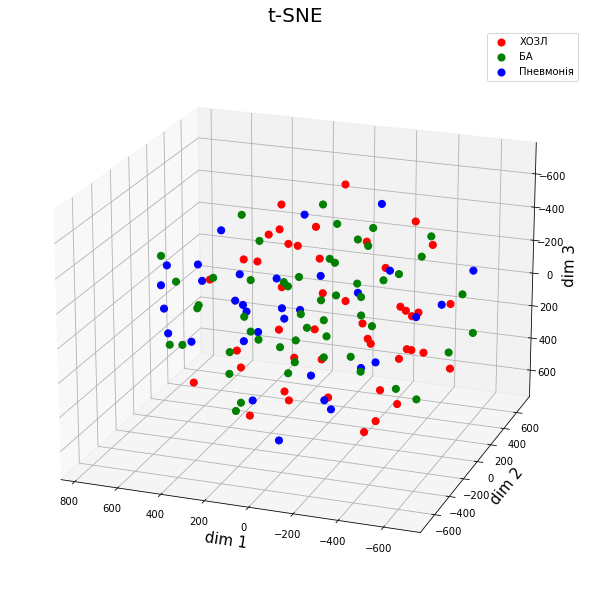

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-160, azim=70) 
ax.set_xlabel('dim 1', fontsize = 15)
ax.set_ylabel('dim 2', fontsize = 15)
ax.set_zlabel('dim 3', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_tsneDf['Діагноз'] == target
    ax.scatter(final_tsneDf.loc[indicesToKeep, 'dim 1'],
               final_tsneDf.loc[indicesToKeep, 'dim 2'],
               final_tsneDf.loc[indicesToKeep, 'dim 3'],
               c = color, alpha = 1,
               s = 50)
ax.legend(targets)
ax.grid()